In [1]:
import numpy as np
import pandas as pd

### Series

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.238258
b   -0.527092
c    1.057823
d   -0.730022
e    0.641723
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
pd.Series(np.random.randn(5))

0   -0.423648
1   -1.458512
2   -0.824812
3   -1.595126
4   -0.588022
dtype: float64

In [5]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

a    0
b    1
c    2
dtype: int64

In [6]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [8]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### series like ndarray

In [9]:
s[0]

-0.23825804612992416

In [10]:
s[:3]

a   -0.238258
b   -0.527092
c    1.057823
dtype: float64

In [11]:
s[s > s.median()]

c    1.057823
e    0.641723
dtype: float64

In [12]:
s[[4, 3, 1]]

e    0.641723
d   -0.730022
b   -0.527092
dtype: float64

In [13]:
np.exp(s)

a    0.787999
b    0.590319
c    2.880094
d    0.481898
e    1.899751
dtype: float64

In [14]:
s.dtype

dtype('float64')

In [15]:
s.array

<PandasArray>
[-0.23825804612992416,  -0.5270916176826937,   1.0578230646064015,
  -0.7300219159505988,   0.6417228871981016]
Length: 5, dtype: float64

In [16]:
s.to_numpy()

array([-0.23825805, -0.52709162,  1.05782306, -0.73002192,  0.64172289])

### Series is dict-like

In [17]:
s['a']

-0.23825804612992416

In [18]:
s['e'] = 12

In [19]:
s

a    -0.238258
b    -0.527092
c     1.057823
d    -0.730022
e    12.000000
dtype: float64

In [20]:
'e' in s

True

In [21]:
'f' in s

False

In [22]:
s['f']

KeyError: 'f'

In [ ]:
s.get('f', np.nan)

### Vectorized operations and label alignment with Series

In [ ]:
s + s

In [23]:
s * 2

a    -0.476516
b    -1.054183
c     2.115646
d    -1.460044
e    24.000000
dtype: float64

In [24]:
np.exp(s)

a         0.787999
b         0.590319
c         2.880094
d         0.481898
e    162754.791419
dtype: float64

In [25]:
s[1:] + s[:-1]

a         NaN
b   -1.054183
c    2.115646
d   -1.460044
e         NaN
dtype: float64

### Name attribute

In [26]:
s = pd.Series(np.random.randn(5), name='something')
s

0    0.526598
1   -0.144710
2   -0.215315
3   -0.635887
4    0.075275
Name: something, dtype: float64

In [27]:
s.name

'something'

In [28]:
s2 = s.rename('different')
s2.name

'different'

### DataFrame

In [29]:
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

In [30]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [31]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [32]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [33]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [34]:
df.columns

Index(['one', 'two'], dtype='object')

In [35]:
d = {
    'one': [1, 2., 3., 4.],
    'two': [4., 3., 2., 1.]
}

In [36]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [37]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [38]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2, 'Hello'), (2, 3, 'World')]

In [39]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [40]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [41]:
pd.DataFrame(data, columns=['C', 'B', 'A'])

,C,B,A
0,b'Hello',2.0,1
1,b'World',3.0,2


In [42]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [43]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [44]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [45]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [46]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ....:               ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ....:               ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ....:               ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ....:               ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [47]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [48]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [49]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), orient='index', columns=['one', 'two', 'three'])

,one,two,three
B,4,5,6
A,1,2,3


In [50]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [51]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [52]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [53]:
df['three'] = df['one'] * df['two']

In [54]:
df['flag'] = df['one'] > 2

In [55]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [56]:
del df['two']

In [57]:
three = df.pop('three')

In [58]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [59]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [60]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [61]:
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [66]:
iris = pd.read_csv('data/iris.csv')

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
(iris.assign(sepal_ratio=iris['sepal_width'] / iris['sepal_length']))

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000
5,5.4,3.9,1.7,0.4,setosa,0.722222
6,4.6,3.4,1.4,0.3,setosa,0.739130
7,5.0,3.4,1.5,0.2,setosa,0.680000
8,4.4,2.9,1.4,0.2,setosa,0.659091
9,4.9,3.1,1.5,0.1,setosa,0.632653


In [71]:
iris.assign(sepal_ratio=lambda x: (x['sepal_width'] / x['sepal_length'])).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


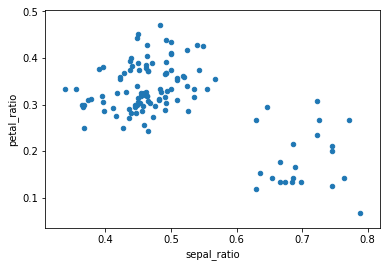

In [76]:
(iris.query('sepal_length > 5')
     .assign(sepal_ratio=lambda x: x.sepal_width / x.sepal_length,
             petal_ratio=lambda x: x.petal_width / x.petal_length)
     .plot(kind='scatter', x='sepal_ratio', y='petal_ratio'))
     

In [80]:
dfa = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [4, 5, 6]
})
dfa.assign(C=lambda x: x['A'] + x['B']).assign(D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [81]:
dependent = pd.DataFrame({'A': [1, 1, 1]})

In [82]:
(dependent.assign(A=lambda x: x['A'] + 1).assign(B=lambda x: x['A'] + 2))

,A,B
0,2,4
1,2,4
2,2,4


In [83]:
df.loc['b']

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [84]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

In [85]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [86]:
df + df2

,A,B,C,D
0,-0.584290,1.199302,-0.078819,NaN
1,0.151641,1.655488,1.082436,NaN
2,1.677814,-3.137998,1.268978,NaN
3,-2.455216,-1.928294,-2.482148,NaN
4,0.008213,-0.409485,2.778744,NaN
5,-0.119589,0.396058,0.007097,NaN
6,-0.559613,2.621926,0.386198,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [87]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.414528,0.152650,0.294456,-0.918326
2,0.836349,-1.336247,1.381929,0.002774
3,-0.391044,-1.022511,-0.740654,0.357275
4,1.318647,-1.155668,1.619115,-2.852313
5,-0.144111,-0.999523,1.679647,-0.215610
6,1.054394,0.041408,-1.019350,-0.878424
7,2.292394,-1.619969,0.957021,-2.290767
8,1.564391,0.090969,-0.568083,-0.048550
9,0.739456,-0.304088,0.261330,1.052814


In [89]:
index =pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [90]:
df

,A,B,C
2000-01-01,1.113861,1.039454,0.337436
2000-01-02,-1.501490,0.302896,1.508507
2000-01-03,1.042065,-0.547024,-1.220572
2000-01-04,0.579961,1.074737,1.110091
2000-01-05,1.369973,0.479660,-1.183873
2000-01-06,-1.155920,0.104570,2.448896
2000-01-07,0.289064,-1.795517,-0.765489
2000-01-08,-1.550139,-0.359296,-1.965289


In [91]:
type(df['A'])

pandas.core.series.Series

In [92]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df * 5 + 2

,A,B,C
2000-01-01,7.569303,7.197272,3.687179
2000-01-02,-5.507448,3.514480,9.542535
2000-01-03,7.210323,-0.735119,-4.102860
2000-01-04,4.899803,7.373687,7.550457
2000-01-05,8.849863,4.398302,-3.919364
2000-01-06,-3.779599,2.522852,14.244478
2000-01-07,3.445320,-6.977587,-1.827443
2000-01-08,-5.750696,0.203519,-7.826445


In [94]:
1 / df

,A,B,C
2000-01-01,0.897778,0.962043,2.963526
2000-01-02,-0.666005,3.301463,0.662907
2000-01-03,0.959633,-1.828074,-0.819288
2000-01-04,1.724255,0.930460,0.900827
2000-01-05,0.729942,2.084808,-0.844685
2000-01-06,-0.865112,9.562928,0.408347
2000-01-07,3.459441,-0.556943,-1.306355
2000-01-08,-0.645103,-2.783219,-0.508831


In [95]:
df ** 4

,A,B,C
2000-01-01,1.539301,1.167405,0.012965
2000-01-02,5.082639,0.008417,5.178324
2000-01-03,1.179176,0.089542,2.219492
2000-01-04,0.113134,1.334165,1.518571
2000-01-05,3.522472,0.052934,1.964356
2000-01-06,1.785299,0.000120,35.965081
2000-01-07,0.006982,10.393418,0.343364
2000-01-08,5.774080,0.016665,14.917830


In [96]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)

In [97]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [98]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [99]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [100]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [101]:
df[:5].T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
A,1.113861,-1.501490,1.042065,0.579961,1.369973
B,1.039454,0.302896,-0.547024,1.074737,0.479660
C,0.337436,1.508507,-1.220572,1.110091,-1.183873


In [102]:
np.exp(df)

,A,B,C
2000-01-01,3.046096,2.827674,1.401350
2000-01-02,0.222798,1.353774,4.519977
2000-01-03,2.835064,0.578669,0.295061
2000-01-04,1.785968,2.929224,3.034636
2000-01-05,3.935243,1.615526,0.306091
2000-01-06,0.314768,1.110234,11.575555
2000-01-07,1.335177,0.166042,0.465107
2000-01-08,0.212218,0.698168,0.140115


In [103]:
np.asarray(df)

array([[ 1.11386066,  1.03945434,  0.33743587],
       [-1.50148959,  0.30289606,  1.50850692],
       [ 1.04206459, -0.5470238 , -1.22057203],
       [ 0.57996056,  1.07473739,  1.11009141],
       [ 1.3699726 ,  0.47966044, -1.18387286],
       [-1.1559199 ,  0.10457048,  2.44889554],
       [ 0.28906401, -1.79551731, -0.76548866],
       [-1.55013917, -0.35929616, -1.96528896]])

In [104]:
df.T.dot(df)

,A,B,C
A,10.616875,1.330469,-4.144661
B,1.330469,6.220492,4.437203
C,-4.144661,4.437203,16.958533


In [105]:
s1 = pd.Series(np.arange(5, 10))

In [106]:
s1.dot(s1)

255

In [107]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [108]:
print(iris.iloc[-20:, :12].to_string())

     sepal_length  sepal_width  petal_length  petal_width    species
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2    

In [109]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.233707,-1.158848,0.955952,0.751905,1.144323,-1.240661,-1.615452,0.080023,-0.363924,0.057792,-0.127820,-0.422525
1,-0.239883,2.357281,0.617161,-2.387575,0.191869,1.378657,1.200567,-1.123740,-0.411117,0.330817,1.118340,-0.947093
2,0.921697,0.518098,2.476680,0.814744,1.206115,1.215287,2.044560,-0.654082,0.497411,0.684146,0.532885,0.000943


In [110]:
pd.set_option('display.width', 40)

In [111]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.307642,-2.059261,1.539352,-1.234808,-0.286515,0.515221,-0.728293,1.380141,-0.171100,-0.350153,0.251932,-0.011668
1,0.842459,1.429577,0.421034,-0.521502,0.159440,0.274419,1.699421,-0.414451,0.362632,-1.025946,-0.600365,0.243087
2,1.503798,-1.119371,-0.549102,1.462353,0.423123,0.809486,0.953602,2.155591,0.302953,0.384066,-0.374393,0.946668


In [112]:
datafile = {
    'filename': ['filename_01', 'filename_02'],
    'path': ['media/user_name/storage/folder_01/filename_01', 'media/user_name/storage/folder_02/filename_02']
}

In [113]:
pd.set_option('display.max_colwidth', 30)

In [114]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [115]:
pd.set_option('display.max_colwidth', 100)

In [116]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [117]:
df = pd.DataFrame({
    'foo1': np.random.randn(5),
    'foo2': np.random.randn(5)
})

In [118]:
df

,foo1,foo2
0,0.852477,-0.991582
1,0.007020,-0.763905
2,1.482817,0.564253
3,1.091642,0.430769
4,-0.053513,-0.023360


In [120]:
df.foo1

0    0.852477
1    0.007020
2    1.482817
3    1.091642
4   -0.053513
Name: foo1, dtype: float64

In [121]:
df.foo1

0    0.852477
1    0.007020
2    1.482817
3    1.091642
4   -0.053513
Name: foo1, dtype: float64

In [122]:
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
              major_axis=pd.date_range('1/1/2000', periods=5),
              minor_axis=['A', 'B', 'C', 'D'])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3265: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [124]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [125]:
data = {
    'Item1': pd.DataFrame(np.random.randn(4, 3)),
    'Item2': pd.DataFrame(np.random.randn(4, 2))
}

In [126]:
pd.Panel(data)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2

In [127]:
pd.Panel.from_dict(data, orient='minor')

/usr/local/lib/python3.5/dist-packages/pandas/core/panel.py:278: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  d = cls._homogenize_dict(cls, data, intersect=intersect, dtype=dtype)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 4 (major_axis) x 2 (minor_axis)
Items axis: 0 to 2
Major_axis axis: 0 to 3
Minor_axis axis: Item1 to Item2

In [128]:
df = pd.DataFrame({'a': ['foo', 'bar', 'baz'],
                   'b': np.random.randn(3)})

In [129]:
df

,a,b
0,foo,-0.428974
1,bar,0.888234
2,baz,0.072958


In [130]:
data = {'item1': df, 'item2': df}

In [131]:
panel = pd.Panel.from_dict(data, orient='minor')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [132]:
panel['a']

,item1,item2
0,foo,foo
1,bar,bar
2,baz,baz


In [133]:
panel['b']

,item1,item2
0,-0.428974,-0.428974
1,0.888234,0.888234
2,0.072958,0.072958


In [134]:
panel['b'].dtypes

item1    float64
item2    float64
dtype: object

In [135]:
midx = pd.MultiIndex(levels=[['one', 'two'], ['x', 'y']],
                     codes=[[1,1,0,0], [1,0,1,0]])

In [136]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}, index=midx)

In [137]:
df.to_panel()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 2 (minor_axis)
Items axis: A to B
Major_axis axis: one to two
Minor_axis axis: x to y

In [138]:
wp['Item1']

,A,B,C,D
2000-01-01,2.685562,-0.850741,0.071166,-0.336385
2000-01-02,2.038740,-1.082787,-0.098820,0.836763
2000-01-03,-1.480258,-0.796602,-0.649665,1.530743
2000-01-04,-0.235340,-1.122479,-0.798545,1.319144
2000-01-05,0.706524,2.215107,0.283523,0.592680


In [139]:
wp['Item3'] = wp['Item1'] / wp['Item2']

In [141]:
wp.transpose(2, 0, 1)

/usr/local/lib/python3.5/dist-packages/pandas/core/panel.py:1287: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return super(Panel, self).transpose(*axes, **kwargs)


<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 3 (major_axis) x 5 (minor_axis)
Items axis: A to D
Major_axis axis: Item1 to Item3
Minor_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00

In [142]:
wp['Item1']

,A,B,C,D
2000-01-01,2.685562,-0.850741,0.071166,-0.336385
2000-01-02,2.038740,-1.082787,-0.098820,0.836763
2000-01-03,-1.480258,-0.796602,-0.649665,1.530743
2000-01-04,-0.235340,-1.122479,-0.798545,1.319144
2000-01-05,0.706524,2.215107,0.283523,0.592680


In [144]:
wp.major_xs(wp.major_axis[2])

,Item1,Item2,Item3
A,-1.480258,0.959639,-1.542516
B,-0.796602,-0.478035,1.666409
C,-0.649665,-0.363846,1.785549
D,1.530743,0.378783,4.041217


In [145]:
wp.minor_axis

Index(['A', 'B', 'C', 'D'], dtype='object')

In [146]:
wp.minor_xs('C')

,Item1,Item2,Item3
2000-01-01,0.071166,1.096028,0.064931
2000-01-02,-0.098820,-0.537730,0.183773
2000-01-03,-0.649665,-0.363846,1.785549
2000-01-04,-0.798545,-0.346279,2.306073
2000-01-05,0.283523,-0.707256,-0.400878


In [147]:
wp.reindex(items=['Item1']).squeeze()

,A,B,C,D
2000-01-01,2.685562,-0.850741,0.071166,-0.336385
2000-01-02,2.038740,-1.082787,-0.098820,0.836763
2000-01-03,-1.480258,-0.796602,-0.649665,1.530743
2000-01-04,-0.235340,-1.122479,-0.798545,1.319144
2000-01-05,0.706524,2.215107,0.283523,0.592680


In [148]:
wp.reindex(items=['Item1'], minor=['B']).squeeze()

2000-01-01   -0.850741
2000-01-02   -1.082787
2000-01-03   -0.796602
2000-01-04   -1.122479
2000-01-05    2.215107
Freq: D, Name: B, dtype: float64

In [149]:
wp.reindex(items=['Item1'], minor=['B']).squeeze()

2000-01-01   -0.850741
2000-01-02   -1.082787
2000-01-03   -0.796602
2000-01-04   -1.122479
2000-01-05    2.215107
Freq: D, Name: B, dtype: float64

In [150]:
panel = pd.Panel(np.random.randn(3, 5, 4), items=['one', 'two', 'three'],
                 major_axis=pd.date_range('1/1/2000', periods=5),
                 minor_axis=['a', 'b', 'c', 'd'])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3265: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [151]:
panel.to_frame()

one       two  \
major      minor                       
2000-01-01 a      0.417563 -1.478139   
           b      0.897184 -0.303838   
           c      2.010922  0.388425   
           d      1.067154 -0.658315   
2000-01-02 a     -0.370754  0.302824   
           b     -0.737120  0.559892   
           c      1.969740 -1.158512   
           d      0.227967 -1.138085   
2000-01-03 a     -0.099115 -0.109882   
           b     -0.339498  0.026395   
           c     -1.158098 -1.160028   
           d      0.565809  0.105700   
2000-01-04 a     -0.087530 -0.920343   
           b      1.232539 -0.036616   
           c      2.070274 -0.337398   
           d     -0.568878 -0.027393   
2000-01-05 a      2.075385  1.383554   
           b     -1.775067 -0.874360   
           c      0.016439  1.038071   
           d      0.474783 -0.315102   

                     three  
major      minor            
2000-01-01 a     -0.418469  
           b      0.467615  
           c     -1.158727  
           d      0.430500  
2000-01-02 a     -0.147881  
           b     -0.690075  
           c     -0.992406  
           d      1.979331  
2000-01-03 a      1.322898  
           b     -0.353078  
           c     -1.929464  
           d      1.274565  
2000-01-04 a      1.707336  
           b     -0.389456  
           c     -1.341700  
           d     -0.928870  
2000-01-05 a      0.005916  
           b      0.725869  
           c     -0.421997  
           d      0.643922

In [152]:
import pandas.util.testing as tm

In [153]:
p = tm.makePanel()

In [154]:
p

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 30 (major_axis) x 4 (minor_axis)
Items axis: ItemA to ItemC
Major_axis axis: 2000-01-03 00:00:00 to 2000-02-11 00:00:00
Minor_axis axis: A to D

In [155]:
p.to_frame()

ItemA     ItemB  \
major      minor                       
2000-01-03 A     -0.235779  0.581669   
           B      0.485095 -1.229269   
           C      0.671251 -1.315686   
           D     -0.089887 -0.963608   
2000-01-04 A     -0.178813  0.816463   
           B     -0.145348 -1.729292   
           C      0.421574  3.183847   
           D      0.042623  1.766608   
2000-01-05 A      0.650412 -0.214559   
           B      2.057041 -1.008916   
           C      0.793117 -1.384771   
           D     -0.287369  0.086734   
2000-01-06 A      0.539733  1.714948   
           B     -1.626107  2.046882   
           C      0.597543  1.809687   
           D     -1.194612  0.487436   
2000-01-07 A     -0.084367 -0.380303   
           B      1.412462 -0.357101   
           C     -1.046922 -1.757070   
           D      1.213161  1.349590   
2000-01-10 A      0.608483  1.832357   
           B      0.037729  1.983891   
           C     -0.407367 -0.131056   
           D     -0.234336 -0.193496   
2000-01-11 A     -0.498128  2.205324   
           B     -1.709157 -0.561608   
           C     -1.641177 -0.896279   
           D     -0.872369 -1.016296   
2000-01-12 A      1.039505  0.585669   
           B      0.375420 -1.081512   
...                    ...       ...   
2000-02-02 C      0.055697  0.530711   
           D      1.370559  1.651035   
2000-02-03 A      0.623702 -0.602199   
           B     -1.188852  0.131785   
           C      1.246087 -0.060269   
           D     -0.354410  1.611743   
2000-02-04 A     -0.480724  0.110137   
           B      1.040166  0.526717   
           C      1.999447 -0.267393   
           D      0.629765  0.143625   
2000-02-07 A     -1.632085 -2.302538   
           B      3.197437  0.518970   
           C     -1.442832 -0.762810   
           D      1.054848  0.162653   
2000-02-08 A      0.553741  0.021440   
           B      0.956417 -1.275073   
           C      0.962286 -1.166866   
           D      1.869032 -1.594746   
2000-02-09 A     -0.587149  1.321136   
           B      0.246302 -0.881186   
           C      0.890048 -0.881497   
           D      0.375595  0.431003   
2000-02-10 A      0.723741  0.486597   
           B      0.237094  0.826952   
           C     -1.346558  0.827814   
           D     -0.536553 -0.416330   
2000-02-11 A     -1.148481 -1.128423   
           B     -0.216574 -0.435369   
           C     -0.829788 -0.110325   
           D      0.935690 -2.205862   

                     ItemC  
major      minor            
2000-01-03 A     -1.277776  
           B      0.298927  
           C     -0.019266  
           D     -1.149125  
2000-01-04 A      1.825898  
           B      0.419789  
           C     -0.312669  
           D      1.251698  
2000-01-05 A      0.939741  
           B      0.930012  
           C      0.111755  
           D      0.758660  
2000-01-06 A      1.328824  
           B     -1.969314  
           C      0.291345  
           D      0.166743  
2000-01-07 A     -0.412044  
           B      1.905617  
           C      2.000416  
           D      0.519984  
2000-01-10 A      1.368778  
           B     -0.272182  
           C     -0.509200  
           D      1.961641  
2000-01-11 A     -0.756915  
           B      0.862029  
           C      1.812733  
           D     -0.906342  
2000-01-12 A     -1.769117  
           B     -0.487104  
...                    ...  
2000-02-02 C      0.221233  
           D     -1.943220  
2000-02-03 A      0.401787  
           B      0.586132  
           C     -0.601342  
           D     -0.398192  
2000-02-04 A      0.354782  
           B     -0.525303  
           C      0.204878  
           D     -0.380936  
2000-02-07 A      0.991088  
           B      0.719563  
           C     -0.415301  
           D      0.656417  
2000-02-08 A      0.149699  
           B     -0.865065  
           C      1.760640  
           D      1.414984  
2000-02-09 A     -0.0

In [157]:
p.to_xarray()

<xarray.DataArray (items: 3, major_axis: 30, minor_axis: 4)>
array([[[-2.357790e-01,  4.850948e-01,  6.712506e-01, -8.988653e-02],
        [-1.788126e-01, -1.453477e-01,  4.215738e-01,  4.262259e-02],
        ...,
        [ 7.237413e-01,  2.370944e-01, -1.346558e+00, -5.365532e-01],
        [-1.148481e+00, -2.165739e-01, -8.297879e-01,  9.356902e-01]],

       [[ 5.816686e-01, -1.229269e+00, -1.315686e+00, -9.636081e-01],
        [ 8.164627e-01, -1.729292e+00,  3.183847e+00,  1.766608e+00],
        ...,
        [ 4.865966e-01,  8.269517e-01,  8.278137e-01, -4.163300e-01],
        [-1.128423e+00, -4.353686e-01, -1.103246e-01, -2.205862e+00]],

       [[-1.277776e+00,  2.989274e-01, -1.926589e-02, -1.149125e+00],
        [ 1.825898e+00,  4.197889e-01, -3.126689e-01,  1.251698e+00],
        ...,
        [ 6.905665e-01, -2.850199e-02,  5.039258e-01,  1.777464e-01],
        [-4.321420e-01,  2.716272e-03, -5.769573e-01,  7.850244e-01]]])
Coordinates:
  * items       (items) object 'ItemA' 'I